Import the required packages below:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

Read in the CSV file data/airlines.csv containing the following info:
![title](data/airlines.png)
Use it to answer the following questions:

1. Make a scatterplot of baggage vs. on time arrivals.

Text(0, 0.5, 'Percentage of on time arrivals')

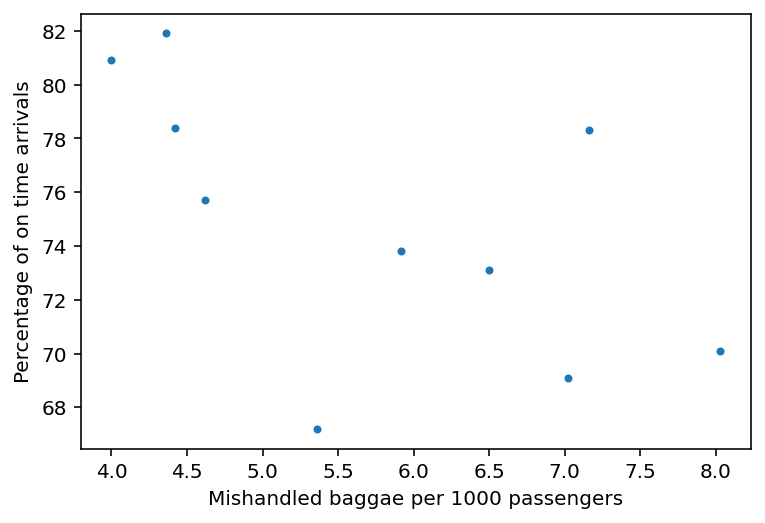

In [2]:
#insert 1
df = pd.read_csv('data/airlines.csv')
plt.plot(df['Mishandled baggage (per 1000 passengers)'], df['Percentage On Time Arrivals'], '.')

plt.xlabel('Mishandled baggae per 1000 passengers')
plt.ylabel('Percentage of on time arrivals')

2. What is the correlation between baggage and on time arrivals?

In [3]:
#insert 2
r = pearsonr(df['Mishandled baggage (per 1000 passengers)'], df['Percentage On Time Arrivals'])[0]
r

-0.5953193405508687

3. What are the mean and standard deviation of the X and Y variables

In [4]:
#insert 3
print(f"X mean: {df['Mishandled baggage (per 1000 passengers)'].mean()}, Y mean: {df['Percentage On Time Arrivals'].mean()}")
print(f"X std: {df['Mishandled baggage (per 1000 passengers)'].std()}, Y std: {df['Percentage On Time Arrivals'].std()}")
xs = df['Mishandled baggage (per 1000 passengers)'].std()
ys = df['Percentage On Time Arrivals'].std()
xm = df['Mishandled baggage (per 1000 passengers)'].mean()
ym = df['Percentage On Time Arrivals'].mean()

X mean: 5.739, Y mean: 74.85000000000001
X std: 1.3977000949973335, Y std: 5.0535466093955606


4. Calculate the line of best fit by hand (show your calculations you use below).

In [5]:
#insert 4
m = r*(ys/xs)
b = ym - m*xm
(m, b)

(-2.152446040260291, 87.20288782505382)

5.Use scikit-learn to calculate the line of best fit. Print the slope and intercept.

In [6]:
df.columns

Index(['Airline', 'Mishandled baggage (per 1000 passengers)',
       'Percentage On Time Arrivals'],
      dtype='object')

In [7]:
# #insert 5
model = LinearRegression()
y = df['Percentage On Time Arrivals']
x = df.drop(['Percentage On Time Arrivals', 'Airline'], axis=1)
# x= df['Mishandled baggage (per 1000 passengers)']
# print(x)
model.fit(x, y)
print('interc: ', model.intercept_)
print('slope: ', model.coef_)

interc:  87.20288782505382
slope:  [-2.15244604]


6.Superimpose the line of best fit on the data.

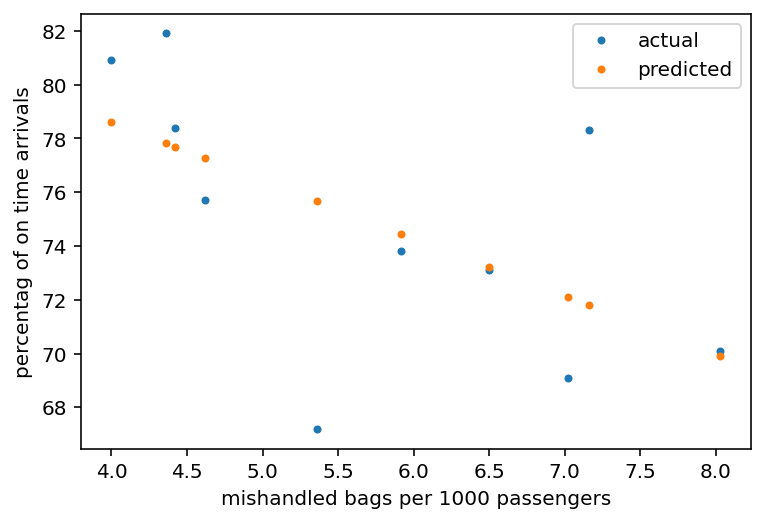

In [8]:
#insert 6
b = model.intercept_
m = model.coef_[0]
plt.plot(x,y,'.', label='actual')
plt.plot(x, m*x+b, '.', label='predicted')
plt.xlabel('mishandled bags per 1000 passengers')
plt.ylabel('percentag of on time arrivals')
plt.legend()

7. Interpret the slope of your model in context.

In [9]:
#insert 7
the slope of the model shows that as the mishandled bags per 1000 pasengers increase, the percentage of ontime arrivals decrease, the slope specifically shows that for every mishandled baggage, approximately 1% of flights are no longer on time (seen from graph)

SyntaxError: invalid syntax (<ipython-input-9-34ee5a91668e>, line 2)

8. Interpret the intercept of your model in context.

In [10]:
#insert 8
the intercept of the model is what the percentage of on time arrivals are at with x=0 mishandled baggages, which is approximately 87.2%

SyntaxError: invalid syntax (<ipython-input-10-293920502f42>, line 2)

9.Calculate and explain the meaning of your $R^2$ in context.

In [11]:
#insert 9
r2 = r**2
print(r2)

0.35440511723392115


In [12]:
r squared is the correlation coefficient of the data, and being at 0.354 means that there is quite a bit of error in the prediction that would not be able to be accounted for. In this case, meaning the data predicted will likely have high residue.

SyntaxError: invalid syntax (<ipython-input-12-922186877c2a>, line 1)

10.Create a residual plot. Based on the residual plot, does a linear model seem appropriate?

Text(0, 0.5, 'Residual')

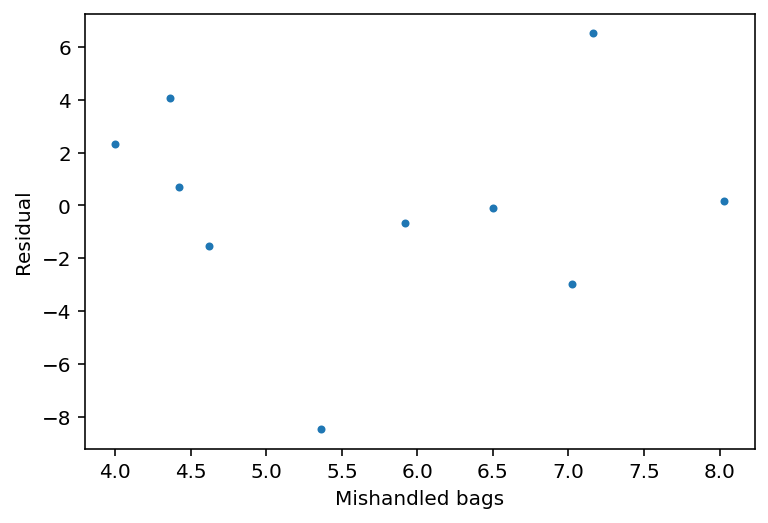

In [13]:
#insert 10
plt.plot(x,y - model.predict(x), '.')
plt.xlabel('Mishandled bags')
plt.ylabel('Residual')
# I think that a linear model could work, the residue does seem very high, but there seems to be no obivious pattern so from what I would know a linear model might be the best, however if I knew a better prediction model to fit something without a pattern, I would use that

11. Calculate the residual of American Airlines using Python syntax.

In [14]:
#insert 11
aa = df.iloc[0, 2]  # y
ap = df.iloc[0, 1]  # x
# ap, aa
ra = aa - (b+(m*ap))
ra

4.081776910481054

12. As a consumer, would you prefer to fly on an airline that had a positive or negative residual? Why?

In [0]:
#insert 12
# Positive residual, because that would mean the chances of my flight arriving on time is higher. Although this is a weird question, because I would rather be late than have them mess up my packages

13. What would you predict an airline with a mishandled baggage rate of 10 (per 1000 customers) to have as their ontime arrival percentage?

In [41]:
#Insert 13
# print(b)
print(b+(m*10))
print('65.678%')

65.67842742245091
65.678%
